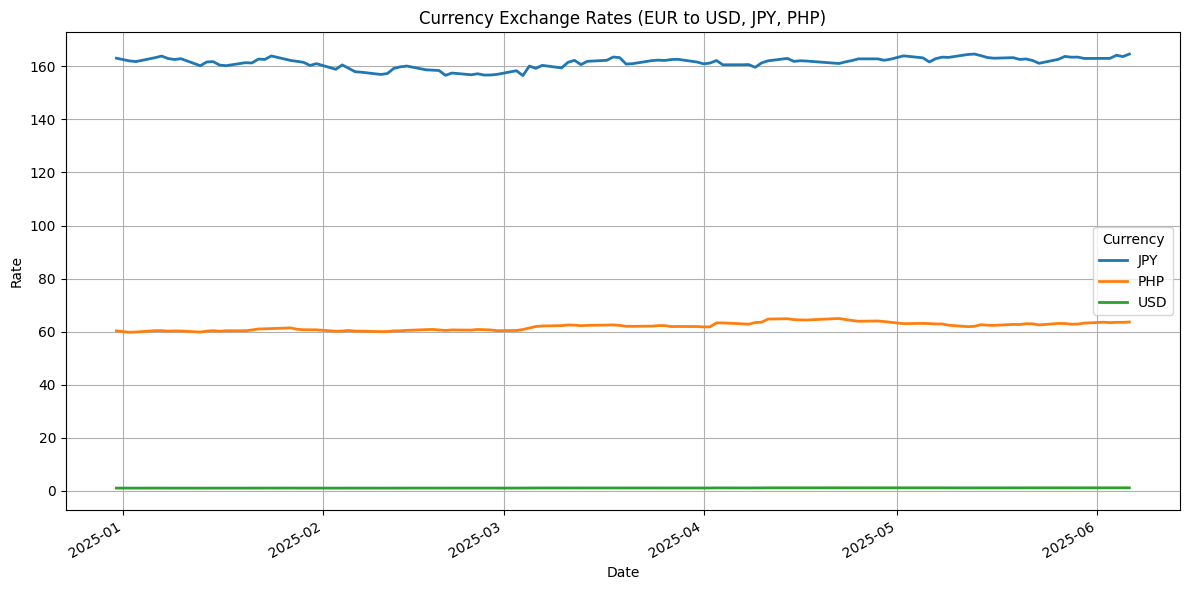

In [9]:
# 1. Imports and Setup
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# 2. Load environment variables
load_dotenv("/Users/Julie/currency_tracker/.env")


DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

# 3. Connect to PostgreSQL
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# 4. Load data into Pandas DataFrame
query = """
SELECT date, currency, rate
FROM exchange_rates
WHERE currency IN ('USD', 'JPY', 'PHP')
ORDER BY date, currency;
"""
df = pd.read_sql(query, engine)

# 5. Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# 6. Pivot for plotting
pivot_df = df.pivot_table(index='date', columns='currency', values='rate', aggfunc='mean')

# 7. Plot
plt.figure(figsize=(12, 6))
pivot_df.plot(ax=plt.gca(), linewidth=2)
plt.title("Currency Exchange Rates (EUR to USD, JPY, PHP)")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.grid(True)
plt.legend(title="Currency")
plt.tight_layout()
plt.show()
